In [335]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [336]:
# Maak een pandas dataframe van de train.csv file
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [337]:
df.head()  # bekijk de eerste 5 rijen krijg een idee van de features
# PassengerId lijkt niet nuttig voor de voorspelling
# Name waarshijnlijk ook niet nuttig

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [338]:
df.info()  # 8693 datapunten met 14 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [339]:
df.isnull().sum()  # aantal 0 null waardes per feature
# Alle features hebben null waardes behalve PassengerId en Transported
# Bijde zijn niet relevant voor de voorspelling
# Alle relevante features moeten dus worden opgeschoond

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [340]:
df.describe()  # statistische informatie over de features

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [341]:
# Bekijk de statistische waardes van de features, dit is nuttig voor numerieke features
def count_plot(column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)  # countplot van de feature
    plt.title(f'{column} count')
    plt.x_label = column
    plt.y_label = 'count'
    plt.show()
    
    print(f'null values: {df[column].isnull().sum()}') # print het aantal null waardes in de kolom
    return df[column].value_counts()  # return de count per waarde

In [342]:
def hist_plot(column, bins=10):
    plt.figure(figsize=(10, 5))
    sns.histplot(x=column, data=df, bins=bins)  # histplot van de feature
    plt.title(f'{column} hist')
    plt.x_label = column
    plt.y_label = 'count'
    plt.show()
    
    print(f'null values: {df[column].isnull().sum()}') # print het aantal null waardes in de kolom
    return df[column].value_counts()  # return de count per waarde

## Data bestuderen

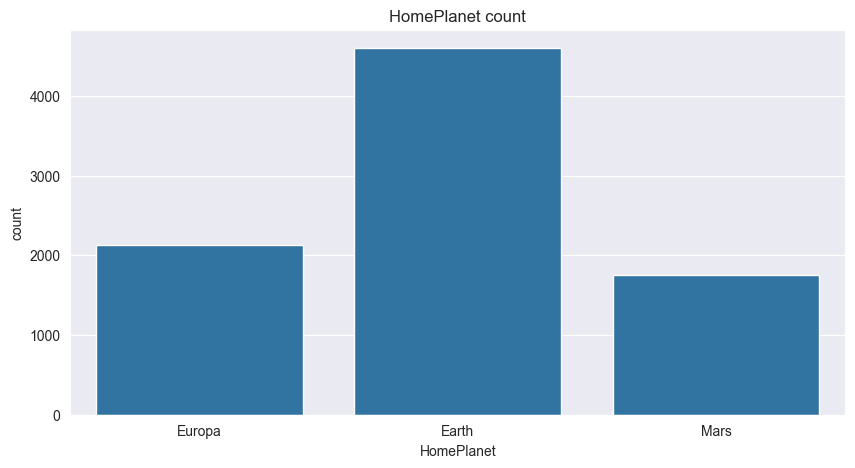

null values: 201


HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [343]:
# HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
count_plot('HomePlanet')

# earth is de meest voorkomende waarde
# 201 null values

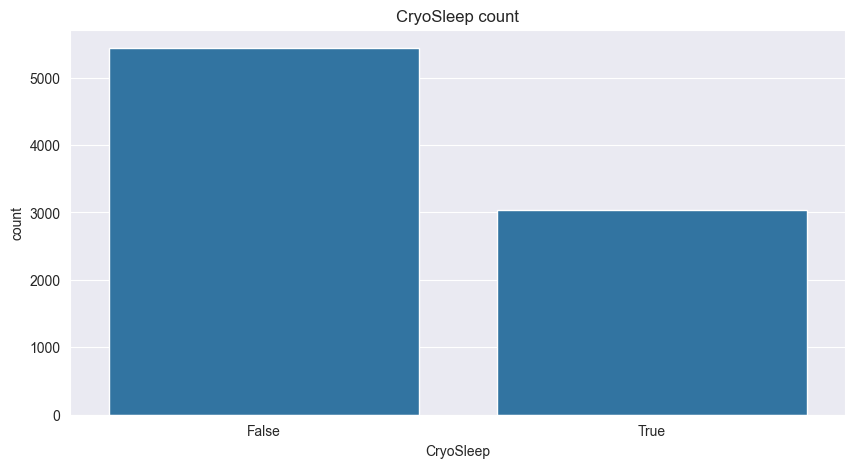

null values: 217


CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [344]:
# CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
count_plot('CryoSleep')

# False is de meest voorkomende waarde
# 217 null values

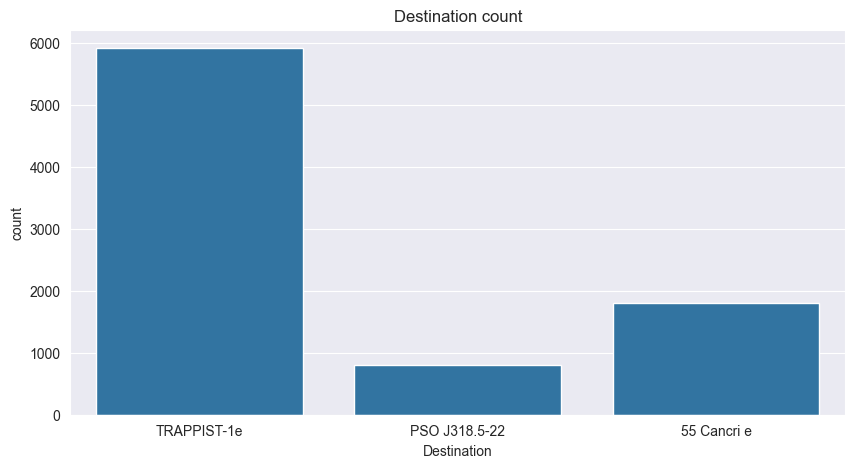

null values: 182


Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [345]:
# Destination - The planet the passenger will be debarking to.
count_plot('Destination')

# TRAPPIST-1e komt verreweg het meest voor
# 182 null values

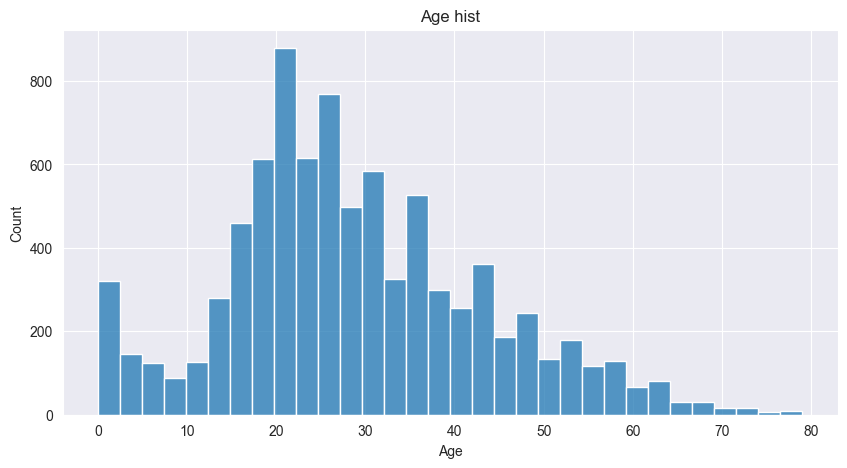

null values: 179


Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

In [346]:
# Age - The age of the passenger.
hist_plot('Age', 32)

# Uitbijters zijn te zien
# 179 null values

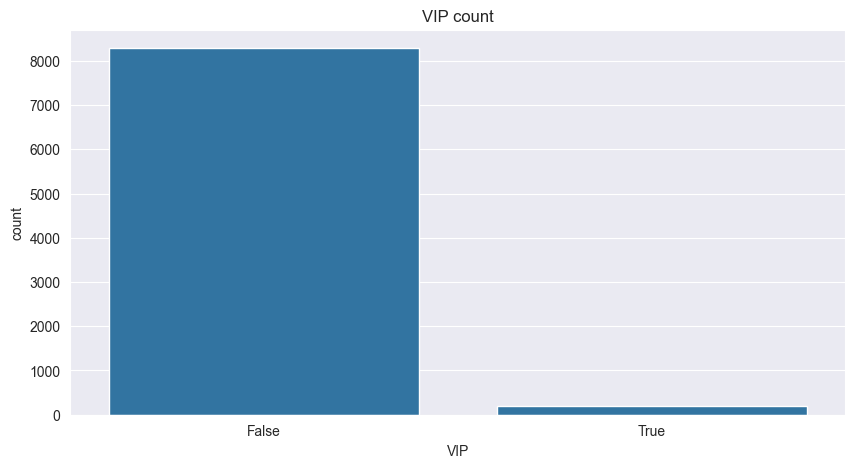

null values: 203


VIP
False    8291
True      199
Name: count, dtype: int64

In [347]:
# VIP - Whether the passenger has paid for special VIP service during the voyage.
count_plot('VIP')

# bijna geen true values feature is misschien niet nuttig
# 203 null values

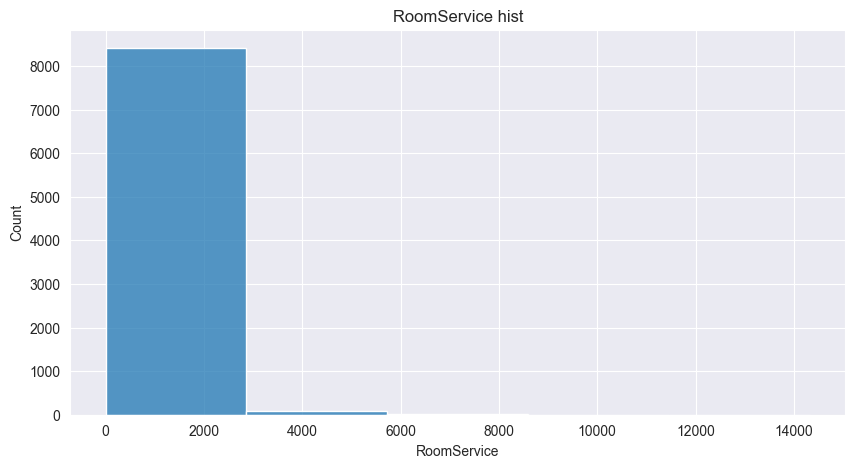

null values: 181


RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64

In [348]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
hist_plot('RoomService', 5)

# Extreme uitbijters zijn te zien
# 181 null values

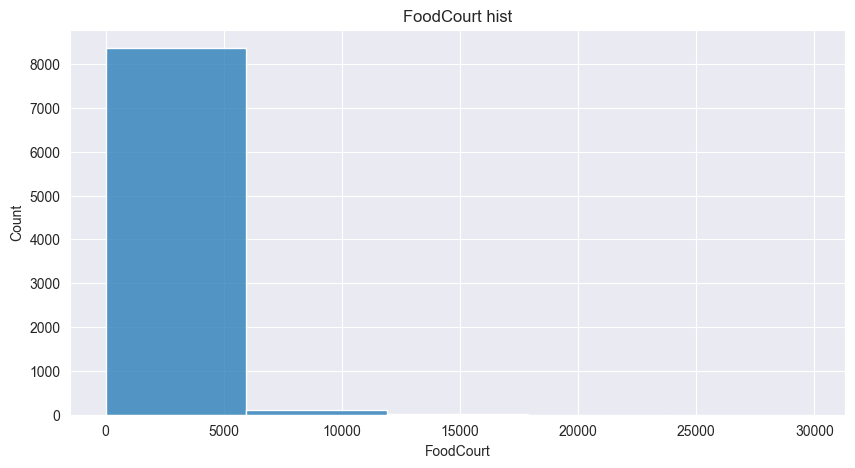

null values: 183


FoodCourt
0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: count, Length: 1507, dtype: int64

In [349]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
hist_plot('FoodCourt', 5)

# Extreme uitbijters zijn te zien
# 183 null values

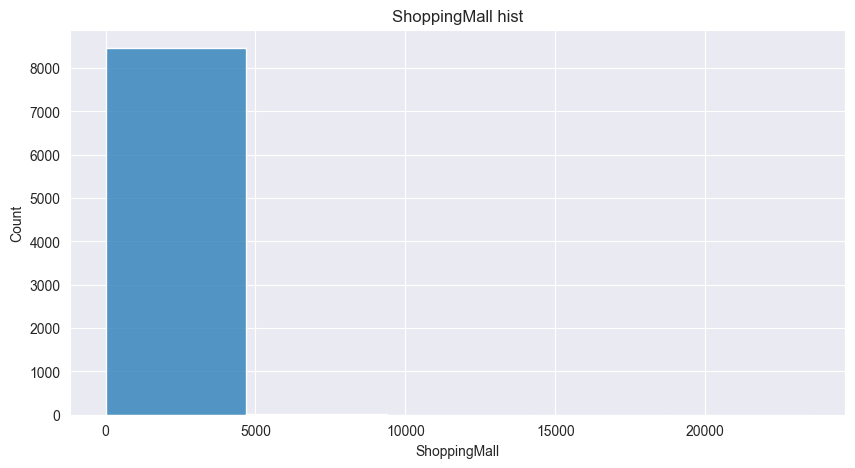

null values: 208


ShoppingMall
0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: count, Length: 1115, dtype: int64

In [350]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
hist_plot('ShoppingMall', 5)

# Extreme uitbijters zijn te zien
# 208 null values

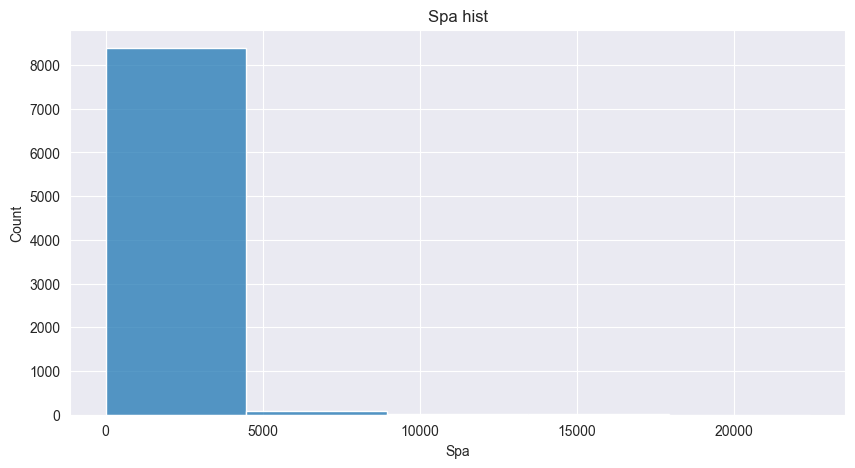

null values: 183


Spa
0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: count, Length: 1327, dtype: int64

In [351]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
hist_plot('Spa', 5)

# Extreme uitbijters zijn te zien
# 183 null values

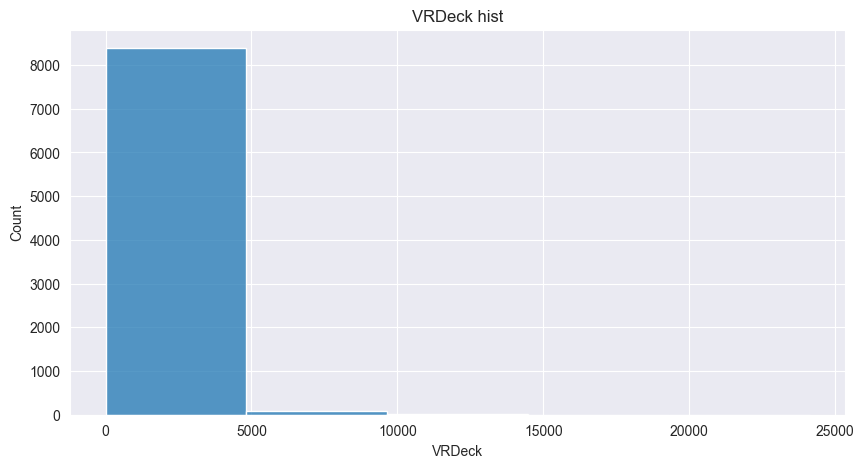

null values: 188


VRDeck
0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: count, Length: 1306, dtype: int64

In [352]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
hist_plot('VRDeck', 5)

# Extreme uitbijters zijn te zien
# 188 null values

## Data opschonen

In [353]:
# PassengerId en Name zijn niet relevant voor de voorspelling dus die worden verwijderd
df = df.drop(['PassengerId','Name'], axis=1)
#df_test = df_test.drop(['Name'], axis=1)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [354]:
# Voor age worden de null waardes vervangen door de gemiddelde leeftijd
df['Age'] = df['Age'].fillna(df['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [355]:
# Voor de features RoomService, FoodCourt, ShoppingMall, Spa, VRDeck is het waarschijnlijk alleen interesant of er wel of niet 
# gebruik van is gemaakt.
# Deze features worden dus omgezet naar een boolean
df['RoomService'] = df['RoomService'].apply(lambda x: 1 if x > 0 else 0)
df_test['RoomService'] = df_test['RoomService'].apply(lambda x: 1 if x > 0 else 0)

df['FoodCourt'] = df['FoodCourt'].apply(lambda x: 1 if x > 0 else 0)
df_test['FoodCourt'] = df_test['FoodCourt'].apply(lambda x: 1 if x > 0 else 0)

df['ShoppingMall'] = df['ShoppingMall'].apply(lambda x: 1 if x > 0 else 0)
df_test['ShoppingMall'] = df_test['ShoppingMall'].apply(lambda x: 1 if x > 0 else 0)

df['Spa'] = df['Spa'].apply(lambda x: 1 if x > 0 else 0)
df_test['Spa'] = df_test['Spa'].apply(lambda x: 1 if x > 0 else 0)

df['VRDeck'] = df['VRDeck'].apply(lambda x: 1 if x > 0 else 0)
df_test['VRDeck'] = df_test['VRDeck'].apply(lambda x: 1 if x > 0 else 0)

df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0,0,0,0,0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,1,1,1,1,1,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,1,1,0,1,1,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0,1,1,1,1,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1,1,1,1,1,True


In [356]:
# Bij VIP kunnen de null waardes worden vervangen door de meest voorkomende waarde
df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
df_test['VIP'] = df_test['VIP'].fillna(df_test['VIP'].mode()[0])
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [357]:
# Destination kan omgevormt worden naar een nummerieke feature
# 0 voor TRAPPIST-1e, 1 voor 55 Cancri e, 2 voor PSO J318.5-22
# null waardes worden vervangen door de meest voorkomende waarde
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
df_test['Destination'] = df_test['Destination'].fillna(df_test['Destination'].mode()[0])

df['Destination'] = df['Destination'].apply(lambda x: 0 if x == 'TRAPPIST-1e' else 1 if x == '55 Cancri e' else 2)
df_test['Destination'] = df_test['Destination'].apply(lambda x: 0 if x == 'TRAPPIST-1e' else 1 if x == '55 Cancri e' else 2)
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [358]:
# HomePlanet kan omgevormt worden naar een nummerieke feature
# 0 voor Earth, 1 voor Europa, 2 voor Mars
# null waardes worden vervangen door de meest voorkomende waarde
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df_test['HomePlanet'] = df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0])

df['HomePlanet'] = df['HomePlanet'].apply(lambda x: 0 if x == 'Earth' else 1 if x == 'Europa' else 2)
df_test['HomePlanet'] = df_test['HomePlanet'].apply(lambda x: 0 if x == 'Earth' else 1 if x == 'Europa' else 2)
df.isnull().sum()

HomePlanet        0
CryoSleep       217
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [359]:
# de laatste null waardes kunnen worden verwijdert
df = df.dropna()
df_test = df_test.dropna()

print(df.isnull().sum())
print(df.head())
df_test.head()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
   HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0           1     False  B/0/P            0  39.0  False            0   
1           0     False  F/0/S            0  24.0  False            1   
2           1     False  A/0/S            0  58.0   True            1   
3           1     False  A/0/S            0  33.0  False            0   
4           0     False  F/1/S            0  16.0  False            1   

   FoodCourt  ShoppingMall  Spa  VRDeck  Transported  
0          0             0    0       0        False  
1          1             1    1       1         True  
2          1             0    1       1        False  
3          1             1    1       1        False  
4          1             1    1       1         True  


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,0,True,G/3/S,0,27.0,False,0,0,0,0,0,Nelly Carsoning
1,0018_01,0,False,F/4/S,0,19.0,False,0,1,0,1,0,Lerome Peckers
2,0019_01,1,True,C/0/S,1,31.0,False,0,0,0,0,0,Sabih Unhearfus
3,0021_01,1,False,C/1/S,0,38.0,False,0,1,0,1,1,Meratz Caltilter
4,0023_01,0,False,F/5/S,0,20.0,False,1,0,1,0,0,Brence Harperez


In [360]:
# normaliseer (gemiddelde eraf en delen door de standaarddeviatie, zodat het op een normaalverdeling gaat lijken)
def normalize(X):
    scaler = StandardScaler()
    scaler.fit(X)
    return scaler.transform(X)

In [361]:
target = ['Transported']
# 'Cabin',
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

X = df[features]
X_final_test = df_test[features]

y = df[target]

normalize(X)
normalize(X_final_test)

array([[-0.8281269 ,  1.30875168, -0.58744562, ..., -0.70432158,
        -0.75752754, -0.71268824],
       [-0.8281269 , -0.76408689, -0.58744562, ..., -0.70432158,
         1.32008402, -0.71268824],
       [ 0.4071083 ,  1.30875168,  0.96611672, ..., -0.70432158,
        -0.75752754, -0.71268824],
       ...,
       [ 1.6423435 ,  1.30875168,  0.96611672, ..., -0.70432158,
        -0.75752754, -0.71268824],
       [ 0.4071083 , -0.76408689, -0.58744562, ..., -0.70432158,
        -0.75752754,  1.40313807],
       [-0.8281269 ,  1.30875168,  2.51967905, ..., -0.70432158,
        -0.75752754, -0.71268824]])

In [362]:
def grid_search(model, parameters, cv=3):
    grid = GridSearchCV(model, parameters, cv=cv, scoring='accuracy', verbose=3, n_jobs=64)
    grid.fit(X, y)
   
    print(f'Best parameters: {grid.best_params_}')

In [363]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest is een ensemble-algoritme voor machine learning dat werkt door een grote verzameling beslissingsbomen te combineren om nauwkeurige voorspellingen te maken. 
# Bootstrap-steekproeven: Random Forest maakt meerdere willekeurige steekproeven van de trainingsgegevens.
# Beslissingsbomen: Voor elke steekproef wordt een beslissingsboom getraind. Deze bomen worden onafhankelijk van elkaar opgebouwd.
# Random feature selectie: Bij het splitsen van knooppunten in de bomen wordt slechts een subset van de kenmerken willekeurig geselecteerd.
# Ensemble: De voorspellingen van alle afzonderlijke bomen worden gecombineerd om een definitieve voorspelling te maken.

# np.arange(start, stop, step)
rf = RandomForestClassifier()
parameters_rf = {
    'n_estimators': np.arange(50, 450, 50), # aantal bomen
    'max_depth': np.arange(2, 15, 1), # maximale diepte van de boom
    'min_samples_leaf': np.arange(1, 12, 1), # minimale aantal samples in een leaf
    'criterion': ['gini', 'entropy'] # criterium om de beste split te bepalen
}

In [364]:
# df_rf = grid_search(rf, parameters)
# df_rf

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state=42)

In [366]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

D:\Programming\ML\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [367]:
confusion_matrix_res = confusion_matrix(y_test, y_pred)
print(confusion_matrix_res)
print(classification_report(y_test, y_pred))

[[301 126]
 [113 289]]
              precision    recall  f1-score   support

       False       0.73      0.70      0.72       427
        True       0.70      0.72      0.71       402

    accuracy                           0.71       829
   macro avg       0.71      0.71      0.71       829
weighted avg       0.71      0.71      0.71       829


In [368]:
# Logistic Regression
# Logistic Regression is een statistisch model dat wordt gebruikt voor classificatiedoeleinden.

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
parameters_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': np.arange(0.05, 2, 0.05),
}

In [369]:
#df_lr = grid_search(lr, parameters_lr)
#df_lr

In [370]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix_res)
print(classification_report(y_test, y_pred_lr))

[[301 126]
 [113 289]]
              precision    recall  f1-score   support

       False       0.71      0.81      0.76       427
        True       0.76      0.64      0.70       402

    accuracy                           0.73       829
   macro avg       0.74      0.73      0.73       829
weighted avg       0.73      0.73      0.73       829


D:\Programming\ML\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [371]:
# Gradient Boosting
# Gradient Boosting is een ensemble machine learning-techniek die werkt door de volgende stappen:
# Bouw een zwak model (bijvoorbeeld een beslissingsboom) om voorspellingen te doen.
# Bereken de fouten tussen de voorspelde waarden en de werkelijke waarden.
# Bouw een nieuw model om deze fouten te voorspellen.
# Herhaal deze stappen meerdere keren en combineer de voorspellingen van alle modellen om een krachtig ensemble-model te creëren.

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
parameters_gb = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': np.arange(0.1, 1.1, 0.1),
    'n_estimators': np.arange(50, 450, 50),
    'max_depth': np.arange(2, 16, 2),
}

In [372]:
# df_gb = grid_search(gb, parameters_gb)
# df_gb

In [373]:
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(confusion_matrix_res)
print(classification_report(y_test, y_pred_gb))

D:\Programming\ML\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[301 126]
 [113 289]]
              precision    recall  f1-score   support

       False       0.72      0.82      0.77       427
        True       0.78      0.66      0.72       402

    accuracy                           0.74       829
   macro avg       0.75      0.74      0.74       829
weighted avg       0.75      0.74      0.74       829


## Final model

In [374]:
final_model = GradientBoostingClassifier()
parameters_final = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': np.arange(0.1, 1.1, 0.1),
    'n_estimators': np.arange(50, 450, 50),
    'max_depth': np.arange(2, 16, 2),
}

final_model.fit(X, y)
y_pred_final = final_model.predict(X_final_test)
y_pred_final

D:\Programming\ML\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ True, False,  True, ...,  True, False,  True])

In [375]:
df_pred = pd.DataFrame(y_pred).astype(int)
df_pred.head()

,0
0,0
1,1
2,1
3,0
4,0


In [376]:
df_pred.columns = ['Transported']
df_pred.head()

,Transported
0,0
1,1
2,1
3,0
4,0


In [377]:
df_pred['Transported'].replace([0,1],[False,True],inplace=True)

In [378]:
df_pred = pd.concat([df_test['PassengerId'], df_pred], axis=1)

In [379]:
df_pred.to_csv('submission.csv', index=False)